In [6]:
import pandas as pd
import os
from pathlib import Path

# Path to the directory containing the 4 scenario folders
base_path = Path("/home/haasehelen/haasehelen/ifwaste/output")  # <-- UPDATE this
EXCLUDE_COLUMNS = ['n_quickcook', 'n_cook', 'n_attempted_cook', 'n_leftovers', 'n_shop',
    'n_quickshop', 'n_attempted_shop']

# Replace with your actual folder names if different
scenario_folders = ["scenario0_no_promotions", "scenario1_bogos_only", "scenario2_temp", "scenario3_both"]

# Dictionary to hold combined dataframes per scenario
scenario_data = {}

for scenario in scenario_folders:
    scenario_path = base_path / scenario
    combined_rows = []
    print(scenario_path)
    # Loop through each subfolder starting with 'run_'
    for run_folder in scenario_path.glob("run_*"):
        run_id = run_folder.name.split("_")[1]  # Extract ID from 'run_<id>'
        
        config_file = run_folder / "log_hh_config.csv"
        output_file = run_folder / "aggregated_outputs.csv"

        # Check both files exist
        if not config_file.exists() or not output_file.exists():
            print(f"Skipping {run_folder} due to missing files.")
            continue

        # Load CSVs
        try:
            df_config = pd.read_csv(config_file)
            df_output = pd.read_csv(output_file)
        except Exception as e:
            print(f"Error reading files in {run_folder}: {e}")
            continue

        # Merge on household identifier
        merge_col_candidates = list(set(df_config.columns) & set(df_output.columns))
        if not merge_col_candidates:
            print(f"No common column to merge on in {run_folder}.")
            continue
        merge_col = merge_col_candidates[0]  # Pick the common merge column

        
        merged_df = pd.merge(df_config, df_output, on=merge_col, how="inner")

        # Add unique key
        merged_df["run_household_key"] = merged_df[merge_col].apply(lambda x: f"run_{run_id}_{x}")
        merged_df = merged_df.drop(columns=EXCLUDE_COLUMNS)  
        combined_rows.append(merged_df)

    # Combine all merged rows for the scenario
    if combined_rows:
        scenario_data[scenario] = pd.concat(combined_rows, ignore_index=True)
        print(f"{scenario}: Combined {len(combined_rows)} runs.")
    else:
        print(f"{scenario}: No valid data found.")



/home/haasehelen/haasehelen/ifwaste/output/scenario0_no_promotions
scenario0_no_promotions: Combined 11 runs.
/home/haasehelen/haasehelen/ifwaste/output/scenario1_bogos_only
scenario1_bogos_only: Combined 11 runs.
/home/haasehelen/haasehelen/ifwaste/output/scenario2_temp
scenario2_temp: Combined 10 runs.
/home/haasehelen/haasehelen/ifwaste/output/scenario3_both
scenario3_both: Combined 11 runs.


In [7]:
scenario_data["scenario0_no_promotions"]

,household,required_servings,budget,adults,children,lvl_of_concern,plate_waste_ratio,avail_time_monday,avail_time_tuesday,avail_time_wednesday,...,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,run_household_key
0,0,55.039,560.7,1,5,0.50,0.187,67,102,161,...,253.656,52.713,161.689,241.932,1028.469,0.000000,866.780,241.932,161.689381,run_1_0
1,1,53.141,560.7,1,5,0.50,0.186,67,102,161,...,241.140,245.044,143.050,350.021,1155.686,67.987465,1077.134,353.511,143.049603,run_1_1
2,2,56.188,560.7,1,5,0.50,0.182,67,102,161,...,191.145,165.883,253.067,453.729,1223.672,113.158991,1078.750,458.743,253.066750,run_1_2
3,3,53.774,560.7,1,5,0.50,0.186,67,102,161,...,244.005,55.507,183.284,268.845,1020.929,16.053374,854.356,268.188,183.283663,run_1_3
4,4,53.141,560.7,1,5,0.50,0.186,67,102,161,...,257.501,44.249,185.921,228.293,978.636,0.000000,792.714,228.293,185.921405,run_1_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,495,27.403,1008.0,1,2,0.21,0.268,39,147,138,...,383.272,258.198,429.895,261.348,989.917,1165.661044,1572.054,414.977,429.894875,run_3_495
5496,496,27.403,1008.0,1,2,0.21,0.268,39,147,138,...,556.057,318.463,462.864,311.960,990.520,1366.822555,1688.379,518.061,462.863511,run_3_496
5497,497,29.659,1008.0,1,2,0.21,0.257,39,147,138,...,379.144,229.243,635.065,309.344,1013.539,1205.679596,1480.171,413.327,635.065053,run_3_497
5498,498,28.707,1008.0,1,2,0.21,0.254,39,147,138,...,258.581,117.898,252.977,187.127,883.954,279.414936,818.581,278.938,252.976788,run_3_498


/scratch/local/8264179/ipykernel_3016868/50123471.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x="scenario", y="Total_kg", palette="Set2")
/scratch/local/8264179/ipykernel_3016868/50123471.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=mean_waste, x="scenario", y="Total_kg", palette="Set2")


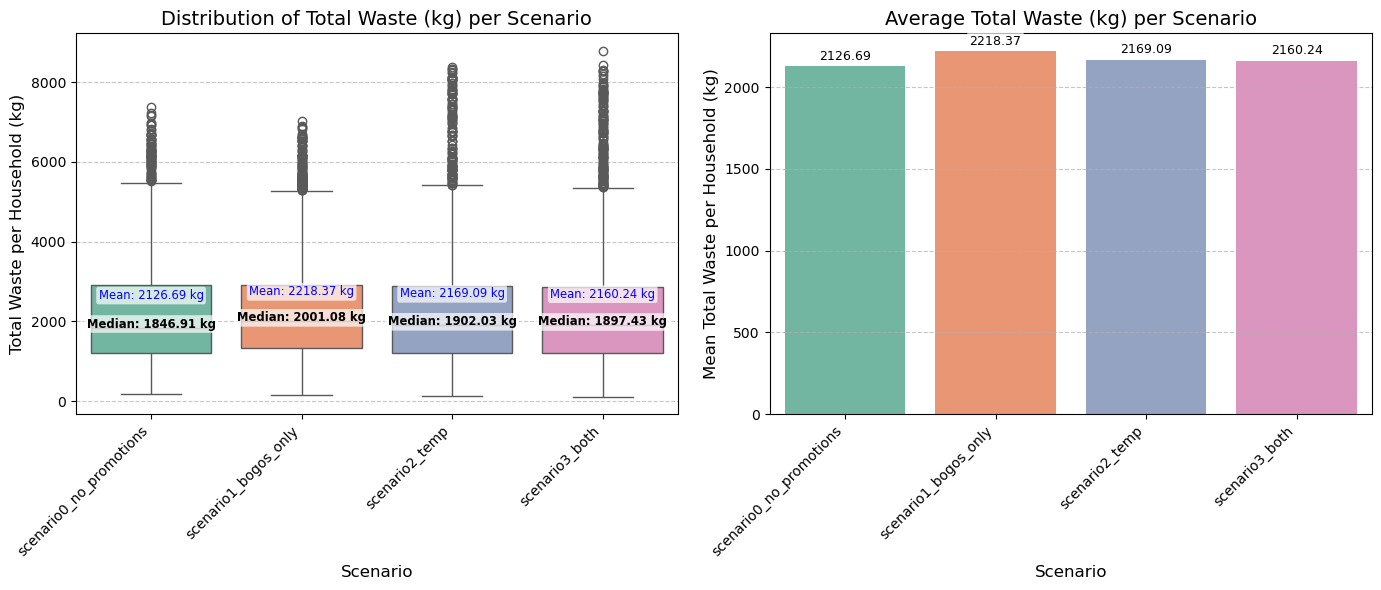

In [ ]:
# Ensure these columns exist
waste_columns = ["Inedible Parts", "Plate Waste", "Spoiled Food"]

# Add Total_kg and scenario column
for scenario_name, df in scenario_data.items():
    if not all(col in df.columns for col in waste_columns):
        print(f"Missing waste columns in scenario '{scenario_name}'. Skipping.")
        continue
    df["Total_kg"] = df[waste_columns].sum(axis=1)
    df["scenario"] = scenario_name  # So we can group by scenario later
    
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'scenario_data' dictionary is already available and populated
# from the previous steps, where each DataFrame has a 'Total_kg' column.

# First, ensure 'Total_kg' is calculated and 'scenario' column exists in each DataFrame
# before concatenating, as the previous code calculated it within the loop.
# If 'Total_kg' is already present and 'scenario' needs to be added:
processed_scenario_dfs = []
for scenario_name, df in scenario_data.items():
    if df is not None:
        # Ensure 'Total_kg' is present and calculated if not done in previous steps
        if 'Total_kg' not in df.columns:
            df['Total_kg'] = df['Inedible Parts'].fillna(0) + \
                             df['Plate Waste'].fillna(0) + \
                             df['Spoiled Food'].fillna(0)

        df['scenario'] = scenario_name # Add scenario name as a column for seaborn plotting
        processed_scenario_dfs.append(df)
    else:
        print(f"Warning: DataFrame for scenario '{scenario_name}' is None. Skipping for plotting.")

# Combine all processed scenarios into one DataFrame for plotting
plot_df = pd.concat(processed_scenario_dfs, ignore_index=True)


plt.figure(figsize=(14, 6))

# --- Boxplot with Summary Statistics ---
plt.subplot(1, 2, 1)
sns.boxplot(data=plot_df, x="scenario", y="Total_kg", palette="Set2")
plt.title("Distribution of Total Waste (kg) per Scenario", fontsize=14)
plt.xlabel("Scenario", fontsize=12)
plt.ylabel("Total Waste per Household (kg)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate summary statistics for annotations on boxplot
# We'll add Median and Mean for each box
medians = plot_df.groupby('scenario')['Total_kg'].median().values
means = plot_df.groupby('scenario')['Total_kg'].mean().values
nobs = plot_df.groupby('scenario')['Total_kg'].count().values # Number of observations

# Get the x-tick locations for placing text
xtick_locations = plt.gca().get_xticks()

# Add median and mean annotations to the boxplot
for i, scenario_name in enumerate(plot_df['scenario'].unique()):
    # Get y-positions for annotations
    # Medians are usually near the box, means can be slightly offset or explicitly placed.
    median_val = medians[i]
    mean_val = means[i]
    n_obs_val = nobs[i]

    # Annotate Median
    plt.text(xtick_locations[i], median_val, f'Median: {median_val:.2f} kg',
             horizontalalignment='center', size='small', color='black', weight='semibold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

    # Annotate Mean (slightly above or below median to avoid overlap)
    # A simple strategy: if median is low, place mean text above. Otherwise, place slightly offset.
    # More robust logic might be needed for very dense plots.
    text_y_offset = (plot_df['Total_kg'].max() - plot_df['Total_kg'].min()) * 0.05
    plt.text(xtick_locations[i], mean_val + text_y_offset, f'Mean: {mean_val:.2f} kg',
             horizontalalignment='center', size='small', color='blue',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

    # Optionally, annotate N (number of observations)
    # plt.text(xtick_locations[i], plot_df['Total_kg'].min() - text_y_offset, f'N: {n_obs_val}',
    #          horizontalalignment='center', size='small', color='gray')


# --- Barplot (Mean) with Value Labels ---
plt.subplot(1, 2, 2)
mean_waste = plot_df.groupby("scenario")["Total_kg"].mean().reset_index()
bars = sns.barplot(data=mean_waste, x="scenario", y="Total_kg", palette="Set2")

# Add value labels on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    # Ensure text is placed well even for very small bars
    offset = 0.01 * plt.gca().get_ylim()[1] # Dynamic offset based on y-axis height
    plt.text(bar.get_x() + bar.get_width()/2, yval + offset, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=9, color='black',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2')) # Add bbox for better visibility

plt.title("Average Total Waste (kg) per Scenario", fontsize=14)
plt.xlabel("Scenario", fontsize=12)
plt.ylabel("Mean Total Waste per Household (kg)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

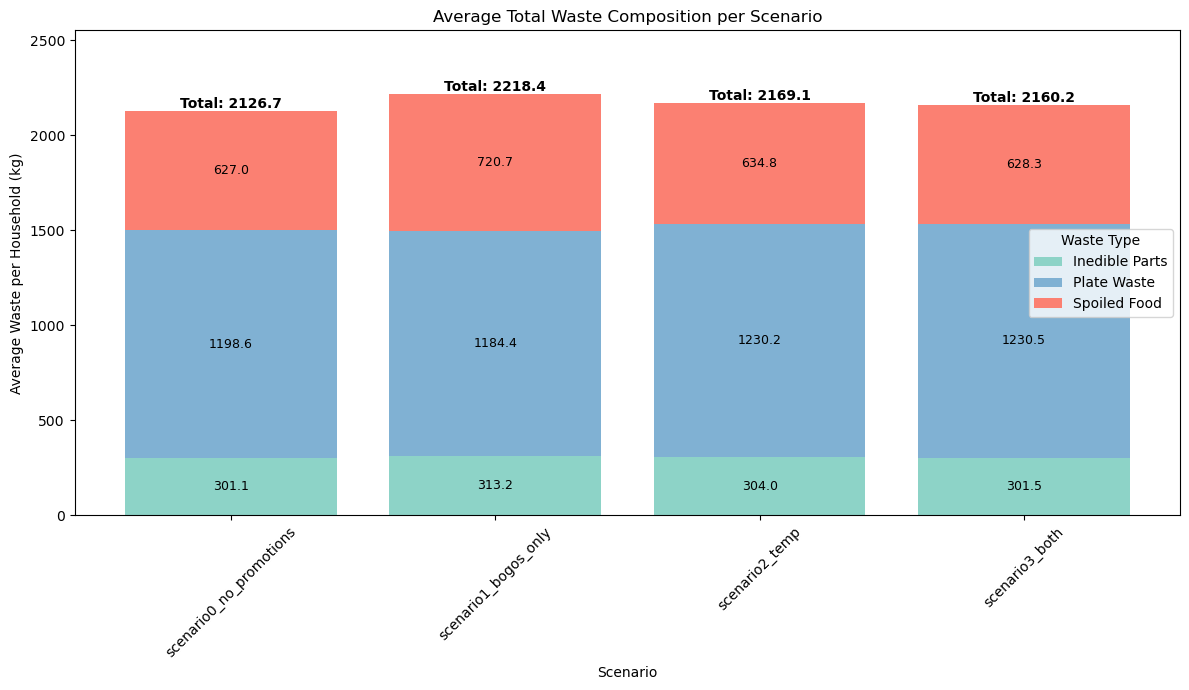

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Compute scenario averages ---
waste_summary = plot_df.groupby("scenario")[waste_columns].mean().reset_index()

# --- Step 2: Plot settings ---
fig, ax = plt.subplots(figsize=(12, 7))
bottom = np.zeros(len(waste_summary))

colors = {
    "Inedible Parts": "#8dd3c7",
    "Spoiled Food": "#fb8072",
    "Plate Waste": "#80b1d3"
}

x = np.arange(len(waste_summary["scenario"]))  # numeric x-positions for bars

# --- Step 3: Plot and annotate each segment ---
for waste_type in waste_columns:
    values = waste_summary[waste_type].values
    ax.bar(x, values, bottom=bottom, label=waste_type, color=colors.get(waste_type, None))

    # Annotate each segment
    for i in range(len(x)):
        y_center = bottom[i] + values[i] / 2
        if values[i] > 0.01:  # avoid cluttering with near-zero labels
            ax.text(x[i], y_center, f"{values[i]:.1f}", ha='center', va='center', fontsize=9, color='black')

    bottom += values

# --- Step 4: Add total value on top ---
total_waste = waste_summary[waste_columns].sum(axis=1).values
for i in range(len(x)):
    ax.text(x[i], bottom[i] + 0.1, f"Total: {total_waste[i]:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# --- Step 5: Format plot ---
ax.set_title("Average Total Waste Composition per Scenario")
ax.set_xlabel("Scenario")
ax.set_ylabel("Average Waste per Household (kg)")
ax.set_xticks(x)
ax.set_xticklabels(waste_summary["scenario"], rotation=45)
ax.legend(title="Waste Type")
ax.set_ylim(0, max(bottom) * 1.15)  # Add room for top labels

plt.tight_layout()
plt.show()


In [10]:
df.head()

,household,required_servings,budget,adults,children,lvl_of_concern,plate_waste_ratio,avail_time_monday,avail_time_tuesday,avail_time_wednesday,...,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,run_household_key,Total_kg,scenario
0,0,55.599,1073.24,1,5,1.0,0.310,138,109,153,...,442.286,360.765040,2301.078,149.950416,1958.122,411.3862,442.286,run_1_0,2811.793456,scenario3_both
1,1,49.612,1073.24,1,5,1.0,0.318,138,109,153,...,437.654,349.630556,2230.847,67.477776,1839.956,370.3461,437.654,run_1_1,2647.955332,scenario3_both
2,2,54.262,1073.24,1,5,1.0,0.309,138,109,153,...,470.985,375.103975,2289.346,200.865466,2001.839,392.4917,470.985,run_1_2,2865.315441,scenario3_both
3,3,53.622,1073.24,1,5,1.0,0.321,138,109,153,...,470.957,381.035495,2379.100,170.347014,2029.945,429.5811,470.957,run_1_3,2930.482509,scenario3_both
4,4,53.622,1073.24,1,5,1.0,0.321,138,109,153,...,428.567,402.681154,2394.435,224.803452,2050.299,543.0532,428.567,run_1_4,3021.919607,scenario3_both


/scratch/local/8264179/ipykernel_3016868/1017930132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x="scenario", y="Total_kg", palette="Set2")
/scratch/local/8264179/ipykernel_3016868/1017930132.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=mean_waste, x="scenario", y="Total_kg", palette="Set2")


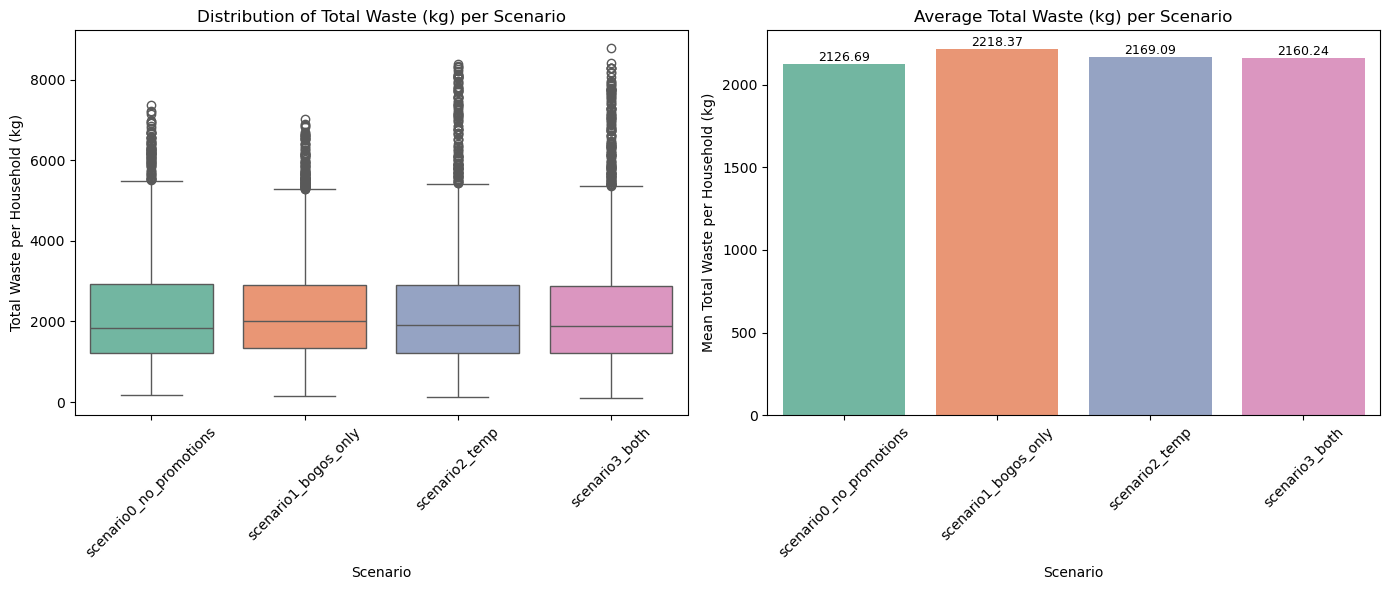

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all scenarios into one DataFrame for plotting
plot_df = pd.concat(scenario_data.values(), ignore_index=True)

plt.figure(figsize=(14, 6))

# --- Boxplot ---
plt.subplot(1, 2, 1)
sns.boxplot(data=plot_df, x="scenario", y="Total_kg", palette="Set2")
plt.title("Distribution of Total Waste (kg) per Scenario")
plt.xlabel("Scenario")
plt.ylabel("Total Waste per Household (kg)")
plt.xticks(rotation=45)

# --- Barplot (Mean) ---
plt.subplot(1, 2, 2)
mean_waste = plot_df.groupby("scenario")["Total_kg"].mean().reset_index()
bars = sns.barplot(data=mean_waste, x="scenario", y="Total_kg", palette="Set2")
for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.title("Average Total Waste (kg) per Scenario")
plt.xlabel("Scenario")
plt.ylabel("Mean Total Waste per Household (kg)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


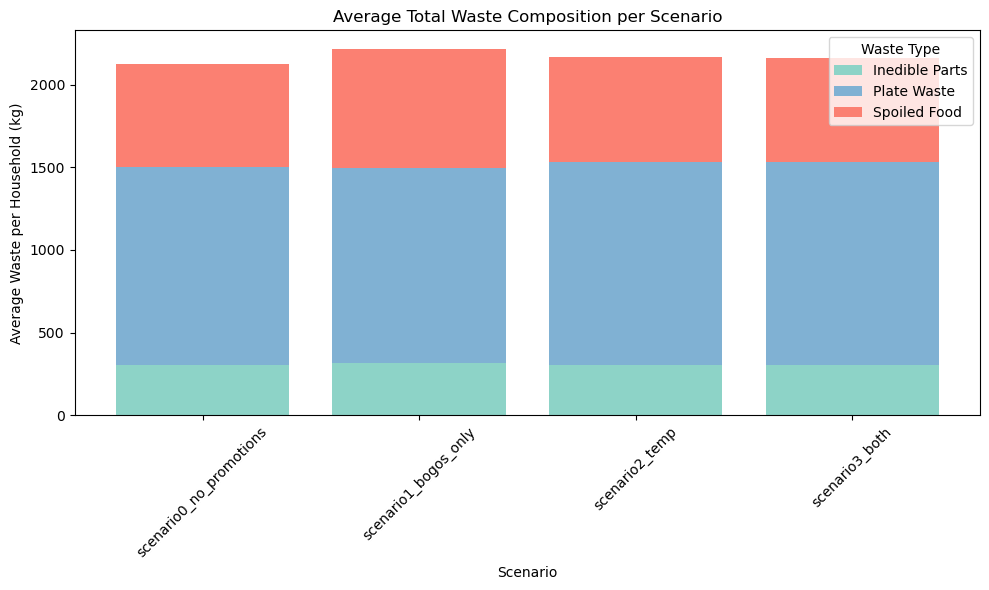

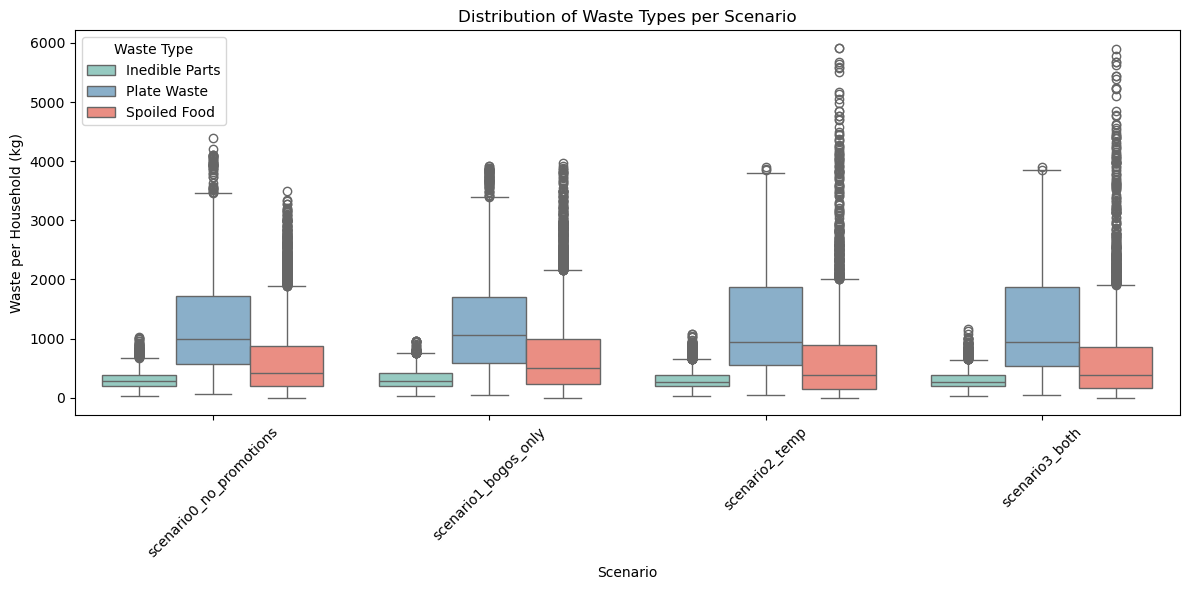

In [12]:
# Compute average of each waste type per scenario
waste_summary = plot_df.groupby("scenario")[waste_columns].mean().reset_index()
# Plot settings
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(waste_summary))

colors = {
    "Inedible Parts": "#8dd3c7",
    "Spoiled Food": "#fb8072",
    "Plate Waste": "#80b1d3"
}

# Plot each waste type stacked
for waste_type in waste_columns:
    plt.bar(waste_summary["scenario"],
            waste_summary[waste_type],
            bottom=bottom,
            label=waste_type,
            color=colors.get(waste_type, None))
    bottom += waste_summary[waste_type].values

plt.title("Average Total Waste Composition per Scenario")
plt.xlabel("Scenario")
plt.ylabel("Average Waste per Household (kg)")
plt.legend(title="Waste Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Melt data to long format for seaborn
melted = plot_df.melt(id_vars=["scenario"], value_vars=waste_columns, 
                      var_name="Waste Type", value_name="Waste (kg)")

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x="scenario", y="Waste (kg)", hue="Waste Type", palette=colors)
plt.title("Distribution of Waste Types per Scenario")
plt.xlabel("Scenario")
plt.ylabel("Waste per Household (kg)")
plt.xticks(rotation=45)
plt.legend(title="Waste Type")
plt.tight_layout()
plt.show()

    

In [13]:
p values in and between groups 

SyntaxError: invalid syntax (2610125924.py, line 1)